## Tesla Stock Price Prediction - Machine Learning Model

Dataset : https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price 


### Importing required modules and performing data preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
import plotly.express as px
from sklearn.preprocessing import StandardScaler
sns.set()

In [ ]:
df=pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
df.shape

(1692, 7)

In [ ]:
stock = df.set_index('Date')
stock

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


## Visualizing the important attributes to decipher the trend of the data

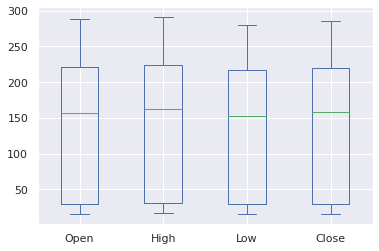

In [ ]:
stock.iloc[:,:4].plot(kind="box")

Text(0.5, 1.0, 'Low and Close')

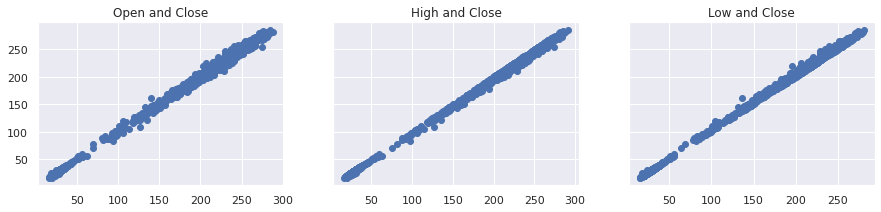

In [ ]:
g, (x1,x3,x4) = plt.subplots(1,3, sharey=True, figsize=(15,3))
x1.scatter(stock['Open'],stock['Close'])
x1.set_title('Open and Close')
x3.scatter(stock['High'],stock['Close'])
x3.set_title('High and Close')
x4.scatter(stock['Low'],stock['Close'])
x4.set_title('Low and Close')

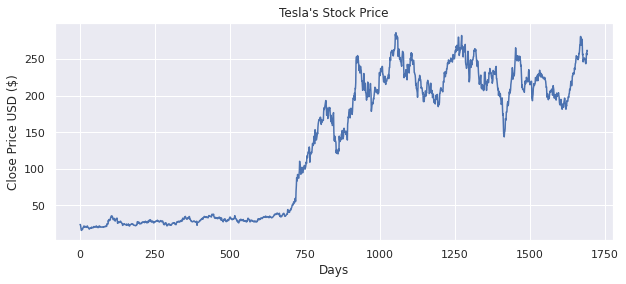

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Tesla's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show()

In [ ]:
fig = px.line(df, x='Date', y="Close")
fig.show()

## Training the model using Linear Regression and Decision Tree Regressor and Computing the Accuracy


In [ ]:
stock

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


Normalizing the values

In [ ]:
scaled = StandardScaler()
scaled.fit(stock)
scaled_data = scaled.transform(stock)

In [ ]:
scaled_data = pd.DataFrame(scaled_data,columns=stock.columns.values)
scaled_data

,Open,High,Low,Close,Volume,Adj Close
0,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,-1.151173
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,-1.151809
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,-1.171642
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,-1.200915
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,-1.233688
...,...,...,...,...,...,...
1687,1.191939,1.171572,1.214979,1.206353,-0.293394,1.206353
1688,1.205621,1.289376,1.249882,1.331823,0.769497,1.331823
1689,1.321126,1.319481,1.338756,1.307747,0.127101,1.307747
1690,1.378400,1.369133,1.390357,1.374778,0.658872,1.374778


In [ ]:
x = scaled_data[['Open','High','Low','Volume']]
y = scaled_data['Close']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state=23)

In [ ]:
x_train.shape , y_train.shape

((1353, 4), (1353,))

In [ ]:
# Creating the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# creating the Linear Regression model
linear = LinearRegression().fit(x_train, y_train)

In [ ]:
test_linear_predict = linear.predict(x_test)

In [ ]:
test_linear_predict

array([ 1.23155009, -1.05815264, -0.92615559,  1.38269163,  0.70947162,
        0.12209354, -1.11869792,  1.29879218, -1.11040187,  1.00752567,
       -0.78578818,  0.76533191, -0.80522243,  0.7428968 , -1.17842846,
       -1.15454644, -1.10154577, -1.03248883,  0.99880358,  0.96303389,
        1.27233619,  0.69418748, -1.11754797,  0.88653141, -1.20083524,
        1.31609253, -1.10875595, -1.09427949,  1.14512794, -1.11273615,
        0.94880077,  1.30028723, -0.16637323, -1.17989044,  0.23068853,
       -0.3290837 ,  0.66073476,  1.39338801,  0.31715296,  1.28589779,
       -1.14800767, -1.17332871, -0.14819229, -1.15063126, -1.10465754,
       -1.12774028, -1.06869353,  0.93442342,  0.99345066,  0.87583937,
        0.33847074,  1.24147382,  1.00516486,  0.83844244, -1.05054199,
       -0.99730399, -1.10221367,  0.6838078 , -1.07813709,  1.17398162,
        1.18251715,  1.06252123,  0.68053317, -1.18109729, -1.09027352,
        0.93797858,  1.40340793, -1.06110051, -1.00916218, -1.16

In [ ]:
test_tree_predict = tree.predict(x_test)

In [ ]:
test_tree_predict

array([ 1.22714073, -1.0601721 , -0.93427763,  1.39397456,  0.71762331,
        0.15454519, -1.13356637,  1.26670146, -1.11373294,  1.01470044,
       -0.83192869,  0.75485084, -0.83192869,  0.75675987, -1.1824605 ,
       -1.16018768, -1.10450562, -1.02952045,  1.00006396,  0.94501825,
        1.27359536,  0.69863845, -1.11892994,  0.88265429, -1.20526363,
        1.35261081, -1.10821776, -1.10121774,  1.14303422, -1.11373294,
        0.95276066,  1.30753503, -0.24795649, -1.17217259,  0.21818183,
       -0.34075992,  0.70086565,  1.38633848,  0.28415181,  1.28812583,
       -1.15180886, -1.17302108, -0.11718327, -1.1497937 , -1.10492988,
       -1.12147539, -1.06929335,  0.90439684,  0.99985179,  0.99985179,
        0.33622784,  1.23551947,  0.97991242,  0.84691177, -1.05221752,
       -1.00311128, -1.09952076,  0.70712337, -1.08202069,  1.18439813,
        1.18439813,  1.05564002,  0.67859292, -1.186809  , -1.09241467,
        0.99985179,  1.36088356, -1.05879334, -1.01615678, -1.17

Linear Regression Prediction Result

In [ ]:
linear_predict_train_table = pd.DataFrame({'Actual':y_test,'prediction': test_linear_predict})
linear_predict_train_table.reset_index(drop=True,inplace=True)
linear_predict_train_table

,Actual,prediction
0,1.241141,1.231550
1,-1.060278,-1.058153
2,-0.922505,-0.926156
3,1.371490,1.382692
4,0.712745,0.709472
...,...,...
334,-0.067229,-0.062214
335,0.244697,0.257425
336,1.174322,1.179010
337,-1.163476,-1.163985


In [ ]:
print(f'Accuracy Score using Linear Regression : {r2_score(test_linear_predict,y_test.values)}')

Accuracy Score using Linear Regression : 0.999680628537914


Text(0.5, 1.0, 'Linear Regression Prediction Result')

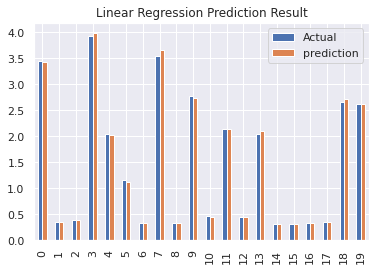

In [ ]:
show_graph_train = np.exp(linear_predict_train_table.head(20))
show_graph_train.plot(kind='bar')
plt.title("Linear Regression Prediction Result")

Decision Tree Regressor Prediction Result

In [ ]:
tree_predict_train_table = pd.DataFrame({'Actual':y_test,'prediction': test_tree_predict})
tree_predict_train_table.reset_index(drop=True,inplace=True)
tree_predict_train_table

,Actual,prediction
0,1.241141,1.227141
1,-1.060278,-1.060172
2,-0.922505,-0.934278
3,1.371490,1.393975
4,0.712745,0.717623
...,...,...
334,-0.067229,-0.126517
335,0.244697,0.198242
336,1.174322,1.192883
337,-1.163476,-1.162309


In [ ]:
print(f'Accuracy Score using Decision Tree Regression : {r2_score(test_tree_predict,y_test.values)}')

Accuracy Score using Linear Regression : 0.9991247312106352


Text(0.5, 1.0, 'Decision Tree Regressor Prediction Result')

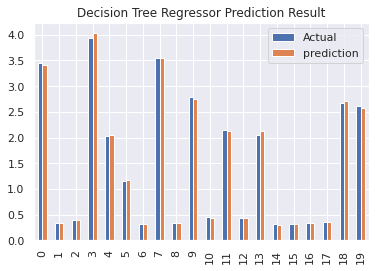

In [ ]:
show_graph_train = np.exp(tree_predict_train_table.head(20))
show_graph_train.plot(kind='bar')
plt.title("Decision Tree Regressor Prediction Result")

<BarContainer object of 2 artists>

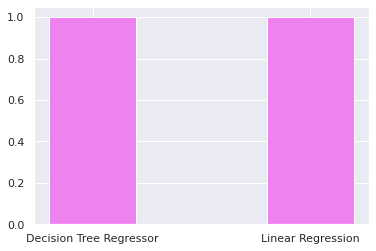

In [ ]:
model_names = ['Decision Tree Regressor' , 'Linear Regression']
model_accuracy = [r2_score(test_tree_predict,y_test) , r2_score(test_linear_predict,y_test)]
plt.bar(model_names, model_accuracy , color = 'violet' ,width = 0.4)